We're going to import the RI public payroll dataset and do a little exploration.

In [89]:
import pandas as pd
import numpy as np

RI_data = pd.read_csv('RIpayroll_export_2018-04-30_08-19.csv', error_bad_lines=False)

# data tokenization is messy - issues with some (~550) rows requiring extra columns. 
# For the moment just going to discard these.

b'Skipping line 7272: expected 13 fields, saw 14\nSkipping line 7279: expected 13 fields, saw 14\nSkipping line 7289: expected 13 fields, saw 14\nSkipping line 7300: expected 13 fields, saw 14\nSkipping line 7318: expected 13 fields, saw 14\nSkipping line 7413: expected 13 fields, saw 15\nSkipping line 7432: expected 13 fields, saw 14\nSkipping line 7433: expected 13 fields, saw 14\nSkipping line 7448: expected 13 fields, saw 14\nSkipping line 7470: expected 13 fields, saw 14\nSkipping line 7486: expected 13 fields, saw 14\nSkipping line 7539: expected 13 fields, saw 15\nSkipping line 7563: expected 13 fields, saw 14\nSkipping line 7573: expected 13 fields, saw 14\nSkipping line 7575: expected 13 fields, saw 14\nSkipping line 7579: expected 13 fields, saw 14\nSkipping line 7586: expected 13 fields, saw 14\nSkipping line 7599: expected 13 fields, saw 14\nSkipping line 7614: expected 13 fields, saw 14\nSkipping line 7655: expected 13 fields, saw 14\nSkipping line 7732: expected 13 fields

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
RI_data.head()

,fiscal_year,last,first,m,department,title,regular,overtime,other,total,annual,termination,
0,2016,TOBEY,JAMES,A,U R I,NON CLASSIFIED,94392.28,0.00,638.76,95031.04,95031.04,,
1,2016,TOBEY,STEPHANIE,A,U R I,NON CLASSIFIED,3576.93,0.00,0.00,3576.93,62000.12,,
2,2016,TISDALE,JACQUELINE,M,U R I,NON CLASSIFIED,54243.32,0.00,362.10,54605.42,56000.1,,
3,2016,TIMPSON JR,DONALD,R,U R I,SR GARDENER,45509.76,4900.29,296.95,50707.00,45751.68,,
4,2016,TINER,JACQUELINE,N,U R I,HUMAN RESOURCES ANALYST I,68550.08,0.00,1001.00,69551.08,68904.42,,


Compare how department mean annual salary changes over fiscal year. Drop the middle initial column, it doesn't seem very useful.

In [93]:
# RI_data.columns
# RI_data = RI_data.drop(' m', axis=1)

years = RI_data['fiscal_year'].unique()
departments = RI_data[' department'].unique()

year_index = pd.Index(years)
dept_index = pd.Index(departments)

means = np.empty(shape = [len(departments), len(years)])

for year in years:
    for dept in departments:
        subset = RI_data.loc[ (RI_data['fiscal_year'] == year) & (RI_data[' department'] == dept) ]
        avg = np.mean( [ float(x) for x in subset[' annual'] ] )
        print( avg )
        means[ dept_index.get_loc(dept), year_index.get_loc(year) ] = avg
        
# some na errors need to be fixed still

NameError: name 'na' is not defined

In [105]:
# a department where salary isn't changing over time

means[1, 0:len(years)]

array([  2.32802090e-314,   2.32838217e-314,   2.32807343e-314,
         2.32804898e-314,   2.32837976e-314,   2.32798947e-314,
         2.32803776e-314,   2.32799302e-314])

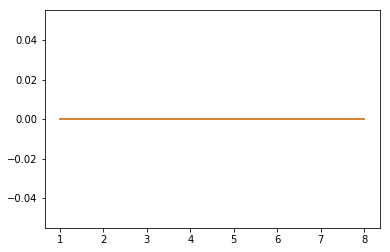

In [112]:
import matplotlib.pyplot as pplot

x = (1,2,3,4,5,6,7,8)
pplot.plot(x, means[1, 0:len(years)])
pplot.show()

In [118]:
means[26, 0:len(years)]

array([  2.32802353e-314,   2.32838058e-314,   2.32802650e-314,
         2.32841492e-314,   2.32836013e-314,   2.32842232e-314,
         2.32363038e-314,   2.32806230e-314])